In [3]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [4]:
# Assuming your data is already loaded into df and cleaned
# Load CSV file, skip the header, and manually assign column names
df = pd.read_csv("../source_coin_data/coinbaseUSD_1-min_data.csv", header=0)
df = df[-500000:]
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df = df.drop(['Symbol', 'Unix Timestamp'], axis=1)
df.rename(columns={
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Volume":"volume"
}, inplace=True)

In [25]:
df.head()

,open,high,low,close,volume,VWAP,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
Date,,,,,,,,,,,
2023-08-17 11:56:00+00:00,28504.57,28504.57,28502.26,28502.46,4.869613,28487.652375,28497.476766,28515.715714,28533.954663,0.127922,0.136610
2023-08-17 11:57:00+00:00,28502.46,28505.01,28501.00,28502.95,17.142992,28488.670945,28496.329573,28515.352143,28534.374713,0.133420,0.174015
2023-08-17 11:58:00+00:00,28502.95,28506.00,28499.53,28504.77,14.652628,28489.464049,28494.712402,28514.438571,28534.164741,0.138359,0.254930
2023-08-17 11:59:00+00:00,28504.93,28506.28,28504.09,28505.67,3.486701,28489.664532,28493.499493,28513.334286,28533.169079,0.139126,0.306797
2023-08-17 12:00:00+00:00,28505.68,28509.07,28495.89,28498.67,13.446558,28490.200477,28491.197369,28511.597143,28531.996917,0.143098,0.183155


In [49]:
df.describe()

,open,high,low,close,volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,64952.270967,64975.377652,64929.336323,64952.361093,6.981325
std,4190.893900,4188.487790,4193.058569,4190.869781,12.866107
min,53785.930000,53936.470000,53499.900000,53785.920000,0.002111
25%,61627.920000,61648.175000,61605.777500,61628.417500,1.402269
50%,66141.570000,66155.930000,66127.680000,66141.710000,3.282211
75%,68154.605000,68180.850000,68129.657500,68154.627500,7.659579
max,71924.930000,71974.040000,71900.900000,71920.020000,646.158688


In [15]:
!pip install seaborn

            open      high       low     close    volume
open    1.000000  0.999998  0.999998  0.999997  0.035082
high    0.999998  1.000000  0.999997  0.999998  0.035902
low     0.999998  0.999997  1.000000  0.999998  0.034095
close   0.999997  0.999998  0.999998  1.000000  0.035004
volume  0.035082  0.035902  0.034095  0.035004  1.000000


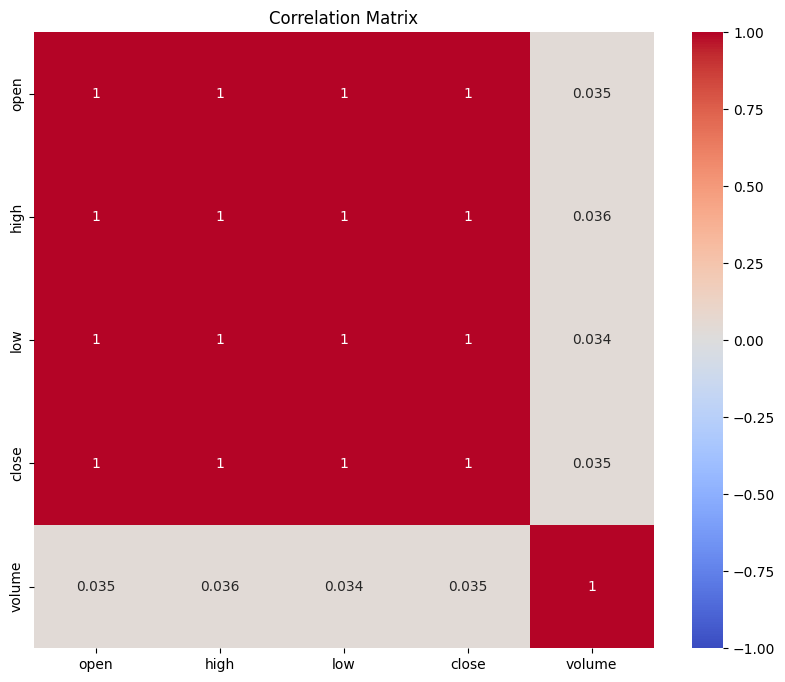

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # or however you load your data

# Calculate the correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Ensure all numerical columns are in the correct format (float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

In [7]:
# Technical indicators
df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)
# df['RSI'] = ta.rsi(df.close, length=16)
my_bbands = ta.bbands(df.close, length=14, std=2.0)
df = df.join(my_bbands)

test_data = df[-105:-50]
df = df[50:-105]

C:\Users\Pc\AppData\Local\Temp\ipykernel_20132\524859344.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)


In [34]:
df.describe()

,open,high,low,close,volume,VWAP,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
count,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000,499895.000000
mean,49331.384765,49351.157744,49311.460545,49331.573797,9.256657,49305.235029,49253.111351,49331.073557,49409.035763,0.300210,0.504106
std,15724.073518,15733.019467,15715.077161,15724.129781,18.281270,15713.460724,15690.185580,15724.078664,15758.322570,0.282420,0.322315
min,24920.850000,25001.410000,24900.000000,24919.720000,0.002111,25155.855760,24943.736030,25003.626429,25058.457846,0.000039,-0.395720
25%,36439.300000,36449.240000,36429.455000,36439.535000,1.806796,36394.612076,36397.627569,36440.497143,36482.860277,0.142045,0.236805
50%,46211.900000,46237.220000,46188.030000,46211.730000,4.203810,46089.286698,46121.593027,46207.235714,46307.895323,0.226232,0.507625
75%,64906.040000,64937.155000,64873.620000,64906.000000,9.887965,64953.456660,64791.517148,64904.443929,65019.796410,0.366637,0.771381
max,73815.030000,73835.570000,73718.320000,73815.430000,1170.009988,73240.403403,73529.031960,73678.231429,73866.053166,12.623073,1.401379


In [8]:
from sklearn.preprocessing import MinMaxScaler
import joblib

df_numeric = df.select_dtypes(include=[np.number])

# Define a scaler for features (all columns)
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = feature_scaler.fit_transform(df_numeric)

# Save both scalers to use during prediction
joblib.dump(feature_scaler, 'feature_scaler.joblib')




['feature_scaler.joblib']

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Припустимо, що у вас є датасет з 7 ознак, включаючи "close"
seq_length = 50
pred_length = 5

# Створюємо функцію для підготовки послідовностей
def create_sequences(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])  # 50 рядків для навчання
        y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Прогнозуємо "close" (індекс 3)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length, pred_length)

In [10]:
df_numeric.describe()

,open,high,low,close,volume,VWAP,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
count,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000,499845.000000
mean,49329.608445,49349.378389,49309.692011,49329.799041,9.253445,49303.276885,49251.345360,49329.287151,49407.228941,0.300156,0.504125
std,15723.856634,15732.800197,15714.868044,15723.914708,18.274648,15713.026777,15689.976440,15723.850256,15758.074630,0.282351,0.322314
min,24920.850000,25001.410000,24900.000000,24919.720000,0.002111,25155.855760,24943.736030,25003.626429,25058.457846,0.000039,-0.395720
25%,36438.990000,36448.870000,36428.940000,36439.190000,1.806631,36394.272435,36396.741345,36440.216429,36482.564705,0.142037,0.236814
50%,46206.660000,46232.210000,46183.540000,46206.530000,4.203195,46085.642091,46112.254674,46200.824286,46301.159213,0.226214,0.507670
75%,64904.040000,64934.800000,64871.180000,64904.000000,9.886166,64953.056305,64789.188861,64903.028571,65017.178809,0.366574,0.771403
max,73815.030000,73835.570000,73718.320000,73815.430000,1170.009988,73240.403403,73529.031960,73678.231429,73866.053166,12.623073,1.401379


In [41]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

# # Припустимо, що у вас є датасет з 7 ознак, включаючи "close"
# seq_length = 50
# pred_length = 5

# # Створюємо функцію для підготовки послідовностей
# def create_sequences(data, seq_length, pred_length):
#     X, y = [], []
#     for i in range(len(data) - seq_length - pred_length + 1):
#         X.append(data[i:i+seq_length])  # 50 рядків для навчання
#         y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Прогнозуємо "close" (індекс 3)
#     return np.array(X), np.array(y)

# X, y = create_sequences(scaled_data, seq_length, pred_length)

# Кастомна функція втрат (MSE між двома векторами з 5 елементів)
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    return mse

# Створюємо модель LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(pred_length)  # Передбачаємо 5 наступних значень "close"
])

# Використовуємо кастомну функцію втрат
model.compile(optimizer='adam', loss=custom_loss)

# Навчання моделі
history = model.fit(X, y, epochs=10, batch_size=12)

# Прогнозуємо на останньому вікні і можемо перевірити на реальних даних
last_sequence = X[-1]  # Беремо останні 50 кроків
predicted_close = model.predict(last_sequence[np.newaxis, :, :])
predicted_close = scaler.inverse_transform(predicted_close)  # Масштабуємо назад

# Виводимо результати
print("Прогнозовані 5 значень 'close':", predicted_close)
print("Реальні 5 значень 'close':", df[-5:, 3])

Epoch 1/10
41654/41654 [==============================] - 506s 12ms/step - loss: 5.5796e-05
Epoch 2/10
41654/41654 [==============================] - 462s 11ms/step - loss: 5.8233e-06
Epoch 3/10
41654/41654 [==============================] - 497s 12ms/step - loss: 4.6345e-06
Epoch 4/10
41654/41654 [==============================] - 503s 12ms/step - loss: 4.0905e-06
Epoch 5/10
41654/41654 [==============================] - 554s 13ms/step - loss: 3.7035e-06
Epoch 6/10
41654/41654 [==============================] - 541s 13ms/step - loss: 3.4758e-06
Epoch 7/10
41654/41654 [==============================] - 545s 13ms/step - loss: 3.3397e-06
Epoch 8/10
41654/41654 [==============================] - 554s 13ms/step - loss: 3.2608e-06
Epoch 9/10
41654/41654 [==============================] - 562s 14ms/step - loss: 3.2043e-06
Epoch 10/10
1/1 [==============================] - 1s 1s/step


NameError: name 'scaler' is not defined

In [17]:
X[-1].shape

(50, 11)

In [10]:
X

array([[0.86779613, 0.86894297, 0.86927899, 0.86937504, 0.02456757,
        0.91250094, 0.87261314, 0.87804861, 0.88277715, 0.09411125,
        0.28140913],
       [0.86958611, 0.86957511, 0.86855508, 0.86697361, 0.02547788,
        0.91238272, 0.870933  , 0.87707452, 0.88250676, 0.10218554,
        0.2538052 ],
       [0.86697026, 0.86679877, 0.86621867, 0.86507814, 0.05745567,
        0.91210104, 0.86916628, 0.8759412 , 0.88200499, 0.10945387,
        0.24752479],
       [0.8649193 , 0.86505635, 0.85992308, 0.85945679, 0.1066229 ,
        0.91152515, 0.86572028, 0.8745661 , 0.88269257, 0.13312504,
        0.1900419 ],
       [0.85933622, 0.85931979, 0.85882718, 0.8597061 , 0.0518847 ,
        0.91123569, 0.86332843, 0.87315681, 0.88226263, 0.14443546,
        0.2504263 ],
       [0.85970968, 0.86158357, 0.86090263, 0.86083135, 0.03961472,
        0.91102673, 0.86173431, 0.87193356, 0.88140965, 0.14877023,
        0.30777002],
       [0.86083538, 0.86428414, 0.86152391, 0.86471001, 0.

In [16]:
print(X[-1])

[[0.87785049 0.8776934  0.87876846 0.87697428 0.00392625 0.91437498
  0.88112863 0.88099456 0.88017628 0.03081815 0.31789155]
 [0.87697881 0.87640701 0.87682554 0.87518885 0.00791195 0.9143428
  0.88032634 0.88065165 0.88029098 0.0360291  0.21668105]
 [0.87519292 0.87469018 0.86937219 0.87169999 0.15706984 0.91362556
  0.87832127 0.88017189 0.88133002 0.05333795 0.12869039]
 [0.87170416 0.87208053 0.86915035 0.87024526 0.09531028 0.91318645
  0.87638418 0.87969062 0.88229836 0.06986991 0.17169707]
 [0.87043652 0.86985667 0.86850674 0.86779229 0.12164605 0.91261291
  0.87390504 0.87885678 0.88310306 0.08857979 0.18229284]
 [0.86779613 0.86894297 0.86927899 0.86937504 0.02456757 0.91250094
  0.87261314 0.87804861 0.88277715 0.09411125 0.28140913]
 [0.86958611 0.86957511 0.86855508 0.86697361 0.02547788 0.91238272
  0.870933   0.87707452 0.88250676 0.10218554 0.2538052 ]
 [0.86697026 0.86679877 0.86621867 0.86507814 0.05745567 0.91210104
  0.86916628 0.8759412  0.88200499 0.10945387 0.247

In [42]:
# model.save_weights("lstm_model_1_weights.h5")

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Create the prediction model
def create_prediction_model(seq_length, features):
    model = Sequential()
    model.add(LSTM(50, stateful=True, batch_input_shape=(1, seq_length, features), return_sequences=True))  # Batch size = 1 for prediction
    model.add(LSTM(50, stateful=True))
    model.add(Dense(5))  # Predicting the next 5 'close' values
    return model

# Initialize the prediction model
predict_model = create_prediction_model(seq_length, X.shape[2])

# Load the weights from the training model
predict_model.load_weights("lstm_model_weights_colab.h5")

# # Prepare the last sequence for prediction
# last_sequence = X[-1]  # Get the last sequence for prediction

# # Reshape to match the expected input shape for the model
# last_sequence = last_sequence[np.newaxis, :, :]

In [24]:
X.shape[2]

11

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

seq_length = 50  # Length of input sequences
pred_length = 5  # Number of values to predict
features = X.shape[2]

In [24]:
import numpy as np
import joblib

# Завантаження скейлера
# feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_sequence = X[-1]
last_sequence = last_sequence[np.newaxis, :, :]

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()

# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

1/1 [==============================] - 1s 679ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67027.54138012 67026.55339465 67044.38084934 67042.72546365
 67059.39881141]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [28]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_50_rows = df_numeric.iloc[-50:].values
scaled_last_50_rows = feature_scaler.transform(last_50_rows)

# Перетворення у формат, очікуваний моделлю
last_sequence = scaled_last_50_rows[np.newaxis, :, :]  # Shape: (1, 50, number_of_features)

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()


# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

c:\Users\Pc\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 671ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67122.60656641 67181.6029969  67264.171187   67171.31512457
 67234.09446109]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [19]:
test_data.shape

(55, 11)

In [22]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_50_rows = test_data[:-5].values
scaled_last_50_rows = feature_scaler.transform(last_50_rows)

# Перетворення у формат, очікуваний моделлю
last_sequence = scaled_last_50_rows[np.newaxis, :, :]  # Shape: (1, 50, number_of_features)

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()


# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = test_data.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", test_data['close'].values[-5:])

c:\Users\Pc\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 745ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67255.73979474 67315.77667011 67393.54482459 67296.59692852
 67354.50628355]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [26]:
temp_array

array([[0.        , 0.        , 0.        , 0.86584324, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.86707109, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.86866158, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.86667883, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.86786318, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [27]:
predicted_close_actual

array([67255.73979474, 67315.77667011, 67393.54482459, 67296.59692852,
       67354.50628355])